Number of detected objects: 19


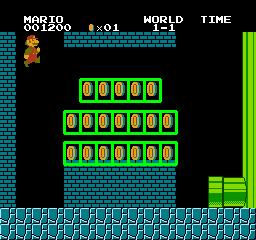

In [55]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from PIL import Image

def non_max_suppression(boxes, overlap_threshold=0.3):
    if len(boxes) == 0:
        return []

    boxes = np.array(boxes)
    pick = []

    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        overlap = (w * h) / area[idxs[:last]]

        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlap_threshold)[0])))

    return boxes[pick].astype("int")

# Read the main image
img_rgb = cv2.imread('/content/gdrive/MyDrive/mario.png')

# Convert it to RGB (PIL uses RGB)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

# Convert it to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Read the template
template = cv2.imread('/content/gdrive/MyDrive/mario_coin3.png', 0)

# Perform template matching
result = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Set a threshold for matches
threshold = 0.8

# Get the locations where the correlation is above the threshold
loc = np.where(result >= threshold)

# Check if any matches were found
if len(loc[0]) > 0:
    # Get the bounding boxes for all matches
    boxes = []
    for pt in zip(*loc[::-1]):
        boxes.append((pt[0], pt[1], pt[0] + template.shape[1], pt[1] + template.shape[0]))

    # Apply non-maximum suppression
    filtered_boxes = non_max_suppression(boxes)

    # Draw rectangles around all unique matched objects
    for box in filtered_boxes:
        cv2.rectangle(img_rgb, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

    # Convert back to BGR for displaying with cv2_imshow
    img_rgb_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

    # Display the number of matches
    num_objects = len(filtered_boxes)
    print(f"Number of detected objects: {num_objects}")

    # Show the final image
    cv2_imshow(img_rgb_bgr)
else:
    print("No matches found.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')